In [27]:
import pandas as pd
import numpy as np
# Input data 
train = pd.read_csv('Downloads/train_house.csv')
train.head()
train.tail()
train.info
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [ ]:
# Handling missing value 
total = train.isnull().sum().sort_values(ascending = False)
percent = (train.isnull().sum()/ len(train)*100).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
print("Missing data:")
print(missing_data)
    # Drop NaN values (Removing missing value)
house = train.dropna(axis=1)
house.head()

In [14]:
 # Split Data into numerical and categorical
    # Numerical
nums_cols = house._get_numeric_data().columns
house_nums = house[nums_cols]
house_nums.head()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,8450,7,5,2003,2003,706,0,150,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,9600,6,8,1976,1976,978,0,284,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,11250,7,5,2001,2002,486,0,434,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,9550,7,5,1915,1970,216,0,540,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,14260,8,5,2000,2000,655,0,490,...,192,84,0,0,0,0,0,12,2008,250000


In [15]:
    # Categorical
house_cate = house.drop(nums_cols,axis=1)
house_cate.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,ExterCond,Foundation,Heating,HeatingQC,CentralAir,KitchenQual,Functional,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,TA,PConc,GasA,Ex,Y,Gd,Typ,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,TA,CBlock,GasA,Ex,Y,TA,Typ,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,TA,PConc,GasA,Ex,Y,Gd,Typ,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,TA,BrkTil,GasA,Gd,Y,Gd,Typ,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,TA,PConc,GasA,Ex,Y,Gd,Typ,Y,WD,Normal


In [16]:
# Save the numerical data to CSV
house_nums.to_csv('House_Train_Numerical.csv', index=False)

# Save the categorical data to CSV
house_cate.to_csv('House_Train_Categorical.csv', index=False)

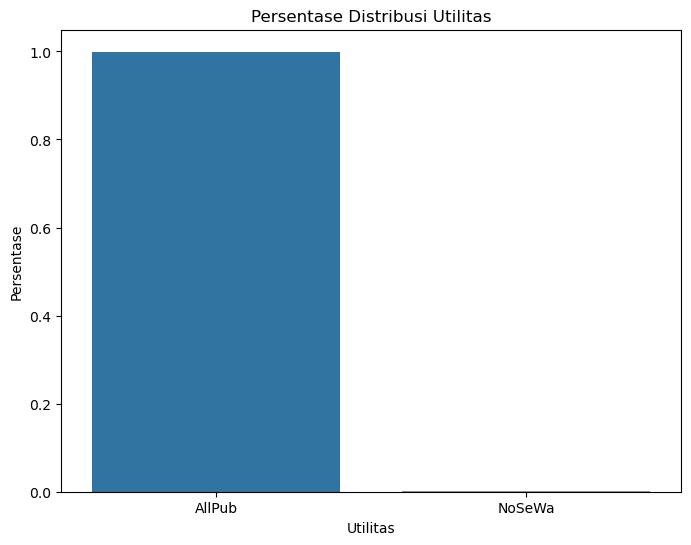

In [18]:
# Visualization 
import matplotlib.pyplot as plt
import seaborn as sns
# Visualization with Bar Chart 
    # Utilities
plt.figure(figsize=(8, 6))
sns.barplot(x=house_cate['Utilities'].value_counts().index,
            y=house_cate['Utilities'].value_counts(normalize=True))
plt.title('Distribution Percentase Utilities')
plt.xlabel('Utilities')
plt.ylabel('Percentase')
plt.show()



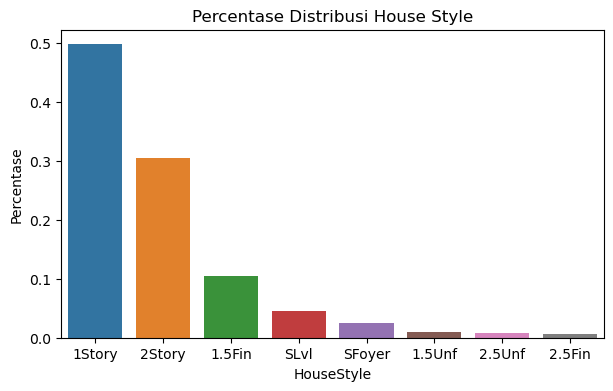

In [20]:
    # House Style
plt.figure(figsize=(7, 4))
sns.barplot(x=house_cate['HouseStyle'].value_counts().index,
            y=house_cate['HouseStyle'].value_counts(normalize=True))
plt.title('Distribution Percentase House Style')
plt.xlabel('HouseStyle')
plt.ylabel('Percentase')
plt.show()

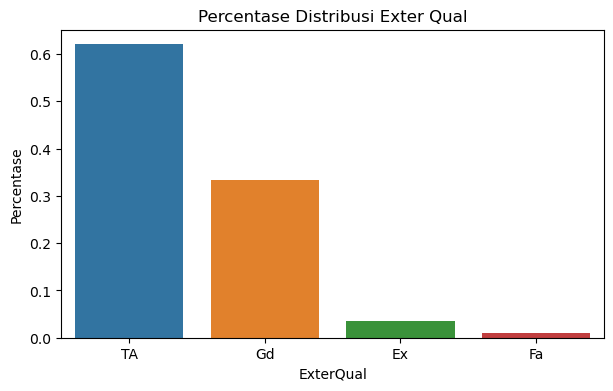

In [21]:
    # House Style
plt.figure(figsize=(7, 4))
sns.barplot(x=house_cate['ExterQual'].value_counts().index,
            y=house_cate['ExterQual'].value_counts(normalize=True))
plt.title('Distribution Percentase Exter Qual')
plt.xlabel('ExterQual')
plt.ylabel('Percentase')
plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_4044\2620976427.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, axlabel= x.name)
F:\anacondapython\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


mean 180921.19589041095
median 163000.0
std.dev 79442.50288288663


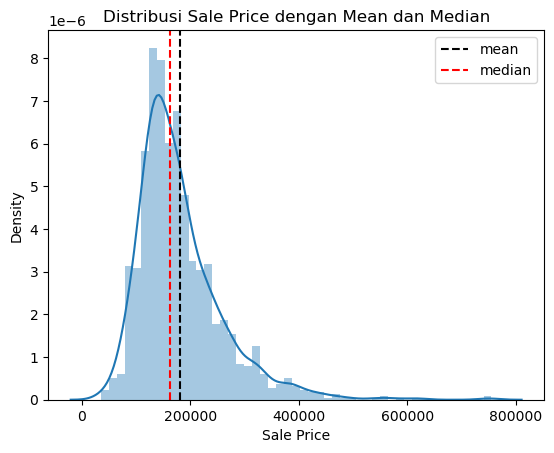

In [25]:
# Visualization with Histogram
    # Sale Price
x = house_nums ['SalePrice']
sns.distplot(x, axlabel= x.name)
line1 = plt.axvline(x.mean(),color="k", linestyle="--",label='mean')
line2 = plt.axvline(x.median(), color="r", linestyle="--",label='median')
firatlegend= plt.legend(handles=[line1,line2],loc=1)
plt.xlabel('Sale Price')  
plt.title('Distribution Sale Price with Mean and Median')
print("mean", x.mean())
print("median", x.median())
print("std.dev", x.std())
plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_4044\1818363860.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, axlabel= x.name)
F:\anacondapython\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


mean 1515.463698630137
median 1464.0
std.dev 525.4803834232027


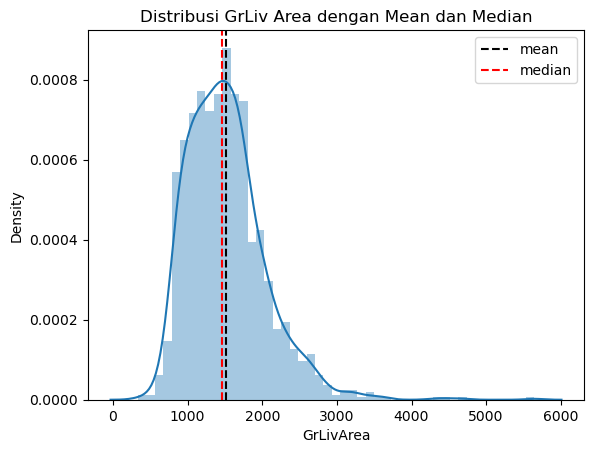

In [28]:
      # GrLiv Area
x = house_nums ['GrLivArea']
sns.distplot(x, axlabel= x.name)
line1 = plt.axvline(x.mean(),color="k", linestyle="--",label='mean')
line2 = plt.axvline(x.median(), color="r", linestyle="--",label='median')
firatlegend= plt.legend(handles=[line1,line2],loc=1)
plt.xlabel('GrLivArea')  
plt.title('Distribution GrLiv Area with Mean and Median')
print("mean", x.mean())
print("median", x.median())
print("std.dev", x.std())
plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_4044\1785891765.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, axlabel= x.name)
F:\anacondapython\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


mean 2.758904109589041
median 0.0
std.dev 40.17730694453043


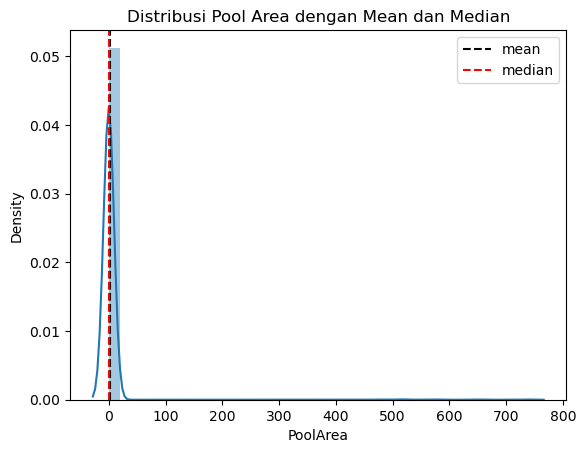

In [29]:
      # Pool Area
x = house_nums ['PoolArea']
sns.distplot(x, axlabel= x.name)
line1 = plt.axvline(x.mean(),color="k", linestyle="--",label='mean')
line2 = plt.axvline(x.median(), color="r", linestyle="--",label='median')
firatlegend= plt.legend(handles=[line1,line2],loc=1)
plt.xlabel('PoolArea')  
plt.title('Distribution Pool Area with Mean and Median')
print("mean", x.mean())
print("median", x.median())
print("std.dev", x.std())
plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_4044\579789929.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, axlabel= x.name)
F:\anacondapython\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


mean 5.221978956475628
median 5.212187604403958
std.dev 0.17347974217176843


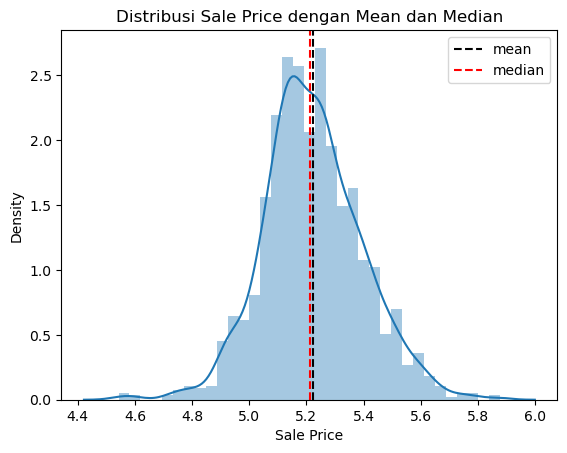

In [31]:
# Transformasi with log scale
    # Sale Price
x = np.log10(house_nums ['SalePrice'])
sns.distplot(x, axlabel= x.name)
line1 = plt.axvline(x.mean(),color="k", linestyle="--",label='mean')
line2 = plt.axvline(x.median(), color="r", linestyle="--",label='median')
firatlegend= plt.legend(handles=[line1,line2],loc=1)
plt.xlabel('log10 Sale Price')  
plt.title('Distribution Logaritma Sale Price')
print("mean", x.mean())
print("median", x.median())
print("std.dev", x.std())
plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_4044\2243365693.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, axlabel= x.name)
F:\anacondapython\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


mean 3.156354310389778
median 3.165541076722373
std.dev 0.14485910869663873


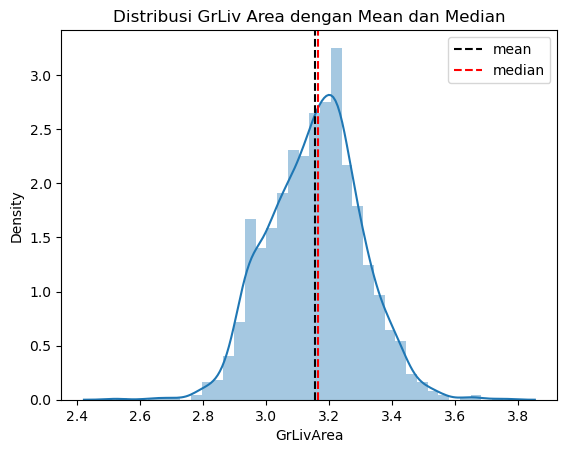

In [32]:
      # GrLiv Area
x = np.log10(house_nums ['GrLivArea'])
sns.distplot(x, axlabel= x.name)
line1 = plt.axvline(x.mean(),color="k", linestyle="--",label='mean')
line2 = plt.axvline(x.median(), color="r", linestyle="--",label='median')
firatlegend= plt.legend(handles=[line1,line2],loc=1)
plt.xlabel('Log10 GrLiv Area')  
plt.title('Distribution Logaritma Grliv Area')
print("mean", x.mean())
print("median", x.median())
print("std.dev", x.std())
plt.show()

F:\anacondapython\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


mean -inf
median -inf
std.dev nan


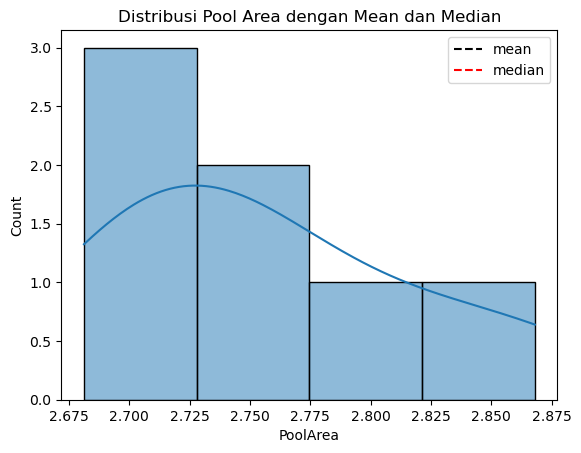

In [35]:
      # Pool Area
x = np.log10(house_nums ['PoolArea'])
sns.histplot(x, kde=True)
line1 = plt.axvline(x.mean(),color="k", linestyle="--",label='mean')
line2 = plt.axvline(x.median(), color="r", linestyle="--",label='median')
firatlegend= plt.legend(handles=[line1,line2],loc=1)
plt.xlabel('Log10 Pool Area')  
plt.title('Distribution Logaritma Pool Area')
print("mean", x.mean())
print("median", x.median())
print("std.dev", x.std())
plt.show()

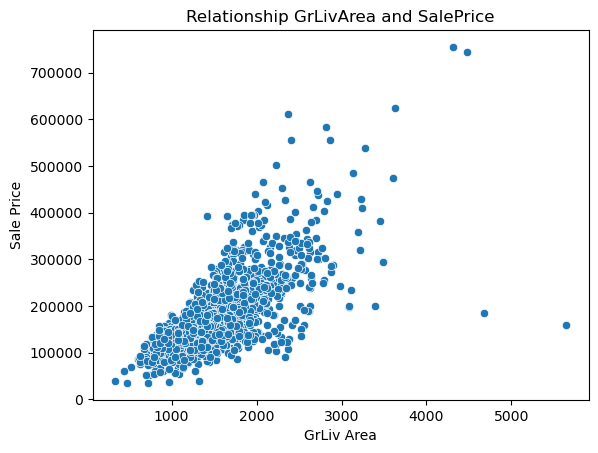

In [38]:
# Visualization of relationship between data sets
    # Grliv Area and Sale Price
ax = sns.scatterplot(x='GrLivArea', y='SalePrice', data=house_nums)
plt.title('Relationship GrLiv Area and Sale Price')
plt.xlabel('GrLiv Area')
plt.ylabel('Sale Price')
plt.show()

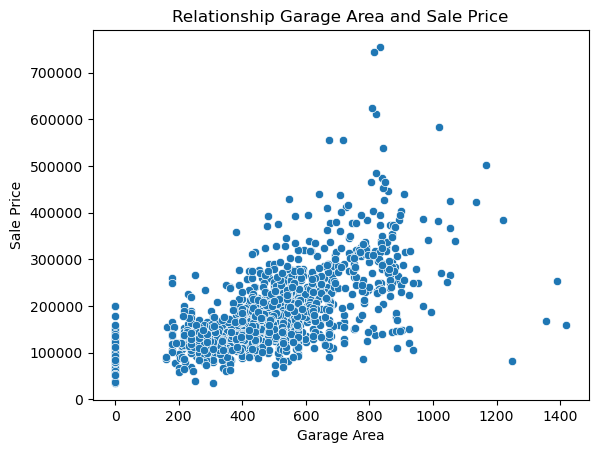

In [39]:
    # Garage Area and Sale Price
ax = sns.scatterplot(x='GarageArea', y='SalePrice', data=house_nums)
plt.title('Relationship Garage Area and Sale Price')
plt.xlabel('Garage Area')
plt.ylabel('Sale Price')
plt.show()